<a href="https://colab.research.google.com/github/NadaNamaniZitouni/Ski_NamaniZitouniNada/blob/main/Yoga_classification_with_resnet34_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download elysian01/yoga-pose-classification

100% 527M/528M [00:15<00:00, 41.0MB/s]
100% 528M/528M [00:15<00:00, 35.7MB/s]


In [ ]:
! unzip yoga-pose-classification.zip

Archive:  yoga-pose-classification.zip
  inflating: dataset/final_test/yoga_set1/1.jpg  
  inflating: dataset/final_test/yoga_set1/11.jpg  
  inflating: dataset/final_test/yoga_set1/3.jpg  
  inflating: dataset/final_test/yoga_set1/4.jpg  
  inflating: dataset/final_test/yoga_set1/5.jpg  
  inflating: dataset/final_test/yoga_set1/6.jpg  
  inflating: dataset/final_test/yoga_set1/7.jpg  
  inflating: dataset/final_test/yoga_set1/8.jpg  
  inflating: dataset/final_test/yoga_set1/9.jpg  
  inflating: dataset/final_test/yoga_set2/1.jpg  
  inflating: dataset/final_test/yoga_set2/10.jpg  
  inflating: dataset/final_test/yoga_set2/2.jpg  
  inflating: dataset/final_test/yoga_set2/3.jpg  
  inflating: dataset/final_test/yoga_set2/4.jpg  
  inflating: dataset/final_test/yoga_set2/5.jpg  
  inflating: dataset/final_test/yoga_set2/6.jpg  
  inflating: dataset/final_test/yoga_set2/7.jpg  
  inflating: dataset/final_test/yoga_set2/8.jpg  
  inflating: dataset/final_test/yoga_set2/9.jpg  
  inflati

In [ ]:
!pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import math
from tensorflow import keras
import numpy as np
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
from livelossplot import PlotLossesKerasTF
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential 
from tensorflow.keras.applications import VGG16, Xception
from tensorflow.keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D, Activation

from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model

from PIL import Image
from PIL import ImageFile

# Enable loading of truncated images without throwing an exception
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Enable displaying of plots in the Jupyter Notebook
%matplotlib inline

# Disable Jedi auto-completion, which can cause slowdowns in some cases
%config Completer.use_jedi = False


In [ ]:
# GPU Configurations

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

Num GPUs Available:  1
1 Physical GPUs, 1 Logical GPUs


In [ ]:
basedir = "./dataset/" # here below the train and validation data

In [ ]:
# Define a function to remove any corrupted images in a given directory
def removeCorruptedImages(path):
    # Iterate through all files in the directory specified by the input path
    for filename in os.listdir(path):
        try:
            # Attempt to open the file as an image
            img = Image.open(os.path.join(path,filename))
            # Verify that the image file is not corrupted
            img.verify() 
        except (IOError, SyntaxError) as e:
            # If an error occurs while attempting to open or verify the file, print an error message
            # indicating that the file is corrupted and delete the file from the directory
            print('Bad file:', filename)
            os.remove(os.path.join(path,filename))


In [ ]:
# Yoga Set 1
yoga_train_path = os.path.join("yoga_set1","train") # root for training
yoga_test_path = os.path.join("yoga_set1","test") # root for testing

# Yoga Set 2
yoga_train_path2 = os.path.join("yoga_set2","train") # root for training
yoga_test_path2 = os.path.join("yoga_set2","test") # root for testing



In [ ]:
traindir = os.path.join(basedir,yoga_train_path) 
validdir = os.path.join(basedir,yoga_test_path) 
traindir2 = os.path.join(basedir, yoga_train_path2) 
validdir2 = os.path.join(basedir, yoga_test_path2) 

In [ ]:
import os

print("changing the names of the images files for  yoga set 1 so it does not clash with the names of yoga set 2")

list_dirs = ["downdog","tree","warrior1"]

for i in list_dirs:
  # Define the path to the second folder
  folder_train1_path = os.path.join(traindir,i) 

  # Define the character to add to the filenames
  char1 = '1_'

  # Loop through the images in folder 1 and rename them
  for filename in os.listdir(folder_train1_path):
    os.rename(os.path.join(folder_train1_path, filename), os.path.join(folder_train1_path, char1 + filename))

for i in list_dirs:
  # Define the path to the second folder
  folder_test2_path = os.path.join(validdir,i) 

  # Define the character to add to the filenames
  char1 = '1_'

  # Loop through the images in folder 1 and rename them
  for filename in os.listdir(folder_train1_path):
    os.rename(os.path.join(folder_train1_path, filename), os.path.join(folder_train1_path, char1 + filename))

changing the names of the images files for  yoga set 1 so it does not clash with the names of yoga set 2


In [ ]:
import os

list_dirs = ["goddess","mountain","warrior2"]

for i in list_dirs:
  # Define the path to the second folder
  folder_train2_path = os.path.join(traindir2,i) 

  # Define the character to add to the filenames
  char1 = '2_'

  # Loop through the images in folder 1 and rename them
  for filename in os.listdir(folder_train1_path):
    os.rename(os.path.join(folder_train1_path, filename), os.path.join(folder_train1_path, char1 + filename))

for i in list_dirs:
  # Define the path to the second folder
  folder_train2_path = os.path.join(validdir2,i) 

  # Define the character to add to the filenames
  char1 = '2_'

  # Loop through the images in folder 1 and rename them
  for filename in os.listdir(folder_train1_path):
    os.rename(os.path.join(folder_train1_path, filename), os.path.join(folder_train1_path, char1 + filename))

In [ ]:
import shutil

merged_train_dir = os.path.join(basedir, "merged_train_dir")

# Create the merged directory if it doesn't exist
if not os.path.exists(merged_train_dir):
    os.makedirs(merged_train_dir)

# Merge the directories
for class_name in os.listdir(traindir):
    src = os.path.join(traindir, class_name)
    dst = os.path.join(merged_train_dir, class_name)
    shutil.copytree(src, dst)

for class_name in os.listdir(traindir2):
    src = os.path.join(traindir2, class_name)
    dst = os.path.join(merged_train_dir, class_name)
    shutil.copytree(src, dst)


In [ ]:
import shutil

merged_test_dir = os.path.join(basedir, "merged_test_dir")

# Create the merged directory if it doesn't exist
if not os.path.exists(merged_test_dir):
    os.makedirs(merged_test_dir)

# Merge the directories
for class_name in os.listdir(validdir):
    src = os.path.join(validdir, class_name)
    dst = os.path.join(merged_test_dir, class_name)
    shutil.copytree(src, dst)

for class_name in os.listdir(validdir2):
    src = os.path.join(validdir2, class_name)
    dst = os.path.join(merged_test_dir, class_name)
    shutil.copytree(src, dst)


In [ ]:
# Yoga Set 1
removeCorruptedImages(os.path.join(merged_train_dir,'tree'))
removeCorruptedImages(os.path.join(merged_train_dir,'downdog'))
removeCorruptedImages(os.path.join(merged_train_dir,'warrior1'))

removeCorruptedImages(os.path.join(merged_test_dir,'tree'))
removeCorruptedImages(os.path.join(merged_test_dir,'downdog'))
removeCorruptedImages(os.path.join(merged_test_dir,'warrior1'))


# Yoga Set 2
removeCorruptedImages(os.path.join(merged_train_dir,'goddess'))
removeCorruptedImages(os.path.join(merged_train_dir,'mountain'))
removeCorruptedImages(os.path.join(merged_train_dir,'warrior2'))

removeCorruptedImages(os.path.join(merged_test_dir,'goddess'))
removeCorruptedImages(os.path.join(merged_test_dir,'mountain'))
removeCorruptedImages(os.path.join(merged_test_dir,'warrior2')) 

In [ ]:
train_datagen=ImageDataGenerator(shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen=ImageDataGenerator(shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
batch_size=8
print("For Training: ")
train_datagen = train_datagen.flow_from_directory(
                  directory = merged_train_dir,
                  target_size=(224,224),
                  batch_size=batch_size,
                  shuffle=True,
                  color_mode="rgb",
                  class_mode='categorical')

print("\nFor Testing: ")
val_datagen = test_datagen.flow_from_directory(
                directory = merged_test_dir,
                target_size=(224,224),
                batch_size=batch_size,
                shuffle=True,
                color_mode="rgb",
                class_mode='categorical')

For Training: 
Found 2496 images belonging to 6 classes.

For Testing: 
Found 389 images belonging to 6 classes.


In [ ]:
def identity_block(x, filter):
    # copy tensor to variable called x_skip
    x_skip = x
    # Layer 1
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Layer 2
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    # Add Residue
    x = tf.keras.layers.Add()([x, x_skip])     
    x = tf.keras.layers.Activation('relu')(x)
    return x

In [ ]:
def convolutional_block(x, filter):
    # copy tensor to variable called x_skip
    x_skip = x
    # Layer 1
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same', strides = (2,2))(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    # Layer 2
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    # Processing Residue with conv(1,1)
    x_skip = tf.keras.layers.Conv2D(filter, (1,1), strides = (2,2))(x_skip)
    # Add Residue
    x = tf.keras.layers.Add()([x, x_skip])     
    x = tf.keras.layers.Activation('relu')(x)
    return x

In [ ]:
def ResNet34(shape = (224, 224, 3), classes = 6):
    # Step 1 (Setup Input Layer)
    x_input = tf.keras.layers.Input(shape)
    x = tf.keras.layers.ZeroPadding2D((3, 3))(x_input)
    # Step 2 (Initial Conv layer along with maxPool)
    x = tf.keras.layers.Conv2D(64, kernel_size=7, strides=2, padding='same')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding='same')(x)
    # Define size of sub-blocks and initial filter size
    block_layers = [3, 4, 6, 3]
    filter_size = 64
    # Step 3 Add the Resnet Blocks
    for i in range(4):
        if i == 0:
            # For sub-block 1 Residual/Convolutional block not needed
            for j in range(block_layers[i]):
                x = identity_block(x, filter_size)
        else:
            # One Residual/Convolutional Block followed by Identity blocks
            # The filter size will go on increasing by a factor of 2
            filter_size = filter_size*2
            x = convolutional_block(x, filter_size)
            for j in range(block_layers[i] - 1):
                x = identity_block(x, filter_size)
    # Step 4 End Dense Network
    x = tf.keras.layers.AveragePooling2D((2,2), padding = 'same')(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(512, activation = 'relu')(x)
    x = tf.keras.layers.Dense(classes, activation = 'softmax')(x)
    model = tf.keras.models.Model(inputs = x_input, outputs = x, name = "ResNet34")
    return model

In [ ]:
# Define the base model and number of output neurons
base_model = ResNet34()
output_neurons = 6

# Define the fully connected layers for the model
model = Sequential()
model.add(Flatten(input_shape=base_model.output_shape[1:])) # Flatten the output of the base model
model.add(Dense(128)) # Add a dense layer with 128 units
model.add(Activation('relu')) # Add ReLU activation function
model.add(Dropout(0.2)) # Add dropout regularization to prevent overfitting
model.add(Dense(output_neurons)) # Add a dense layer with the specified number of output neurons
model.add(Activation('softmax')) # Add softmax activation function to output layer

# Combine the base model and fully connected layers
model = Model(inputs=base_model.input, outputs=model(base_model.output))

# Compile the model
optimizers = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True) # Use SGD optimizer with specified learning rate, momentum and nesterov acceleration
losss = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2)
model.compile(loss=losss,
             optimizer=optimizers,
              metrics=['accuracy'])

model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 115, 115, 64  9472        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

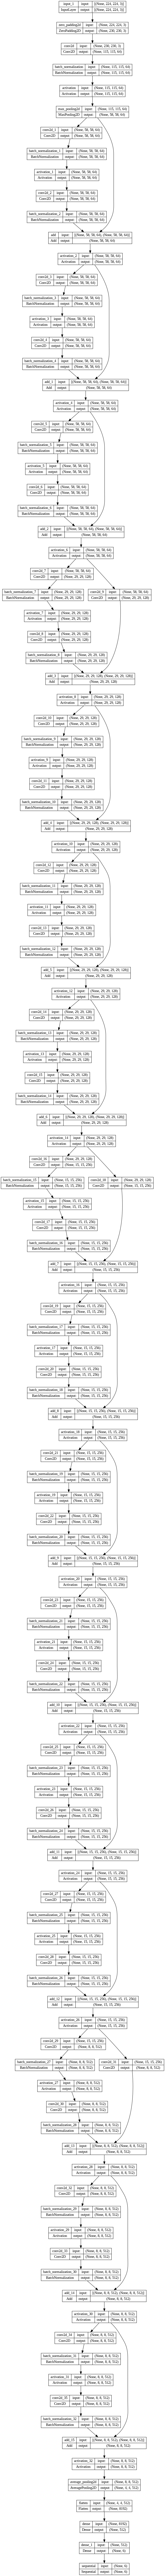

In [ ]:
#Plotting the model architecture into an image
from keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='residual_module.png')

In [ ]:
# Define a custom callback for stopping training when a certain accuracy threshold is reached
class ConvolutionCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        # Check if the training accuracy and validation accuracy are both above 85%
        if(logs.get('accuracy') >= 0.85 and logs.get('val_accuracy') >= 0.85):
            # Print message and stop training
            print("Reached greater than 99.0% accuracy so cancelling training!")
            self.model.stop_training = True

# Define other callbacks for monitoring training and saving the model
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=0.001, mode='auto')
checkpoint = keras.callbacks.ModelCheckpoint("./checkpoints_models/pose_classification_model_weights2.h5", monitor='val_accuracy', save_weights_only=True, mode='max', verbose=1)
convolutionCallback = ConvolutionCallback()
callbacks = [PlotLossesKerasTF(), checkpoint, reduce_lr, convolutionCallback]

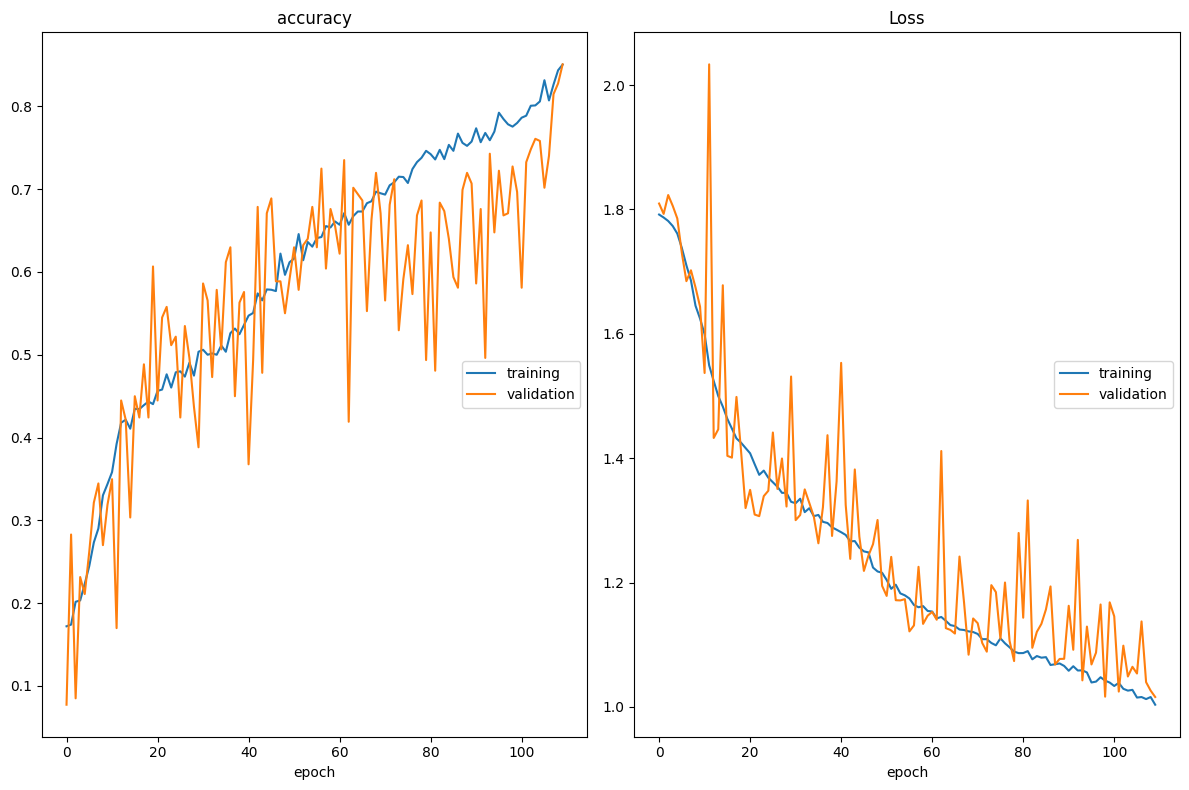

accuracy
	training         	 (min:    0.172, max:    0.851, cur:    0.851)
	validation       	 (min:    0.077, max:    0.851, cur:    0.851)
Loss
	training         	 (min:    1.004, max:    1.792, cur:    1.004)
	validation       	 (min:    1.016, max:    2.033, cur:    1.016)

Epoch 110: saving model to ./checkpoints_models/pose_classification_model_weights2.h5
Reached greater than 99.0% accuracy so cancelling training!
312/312 [==============================] - 96s 308ms/step - loss: 1.0036 - accuracy: 0.8506 - val_loss: 1.0160 - val_accuracy: 0.8509 - lr: 0.0010


In [ ]:
#Training the model
history = model.fit(train_datagen, epochs=200, validation_data = val_datagen, callbacks=callbacks, batch_size = 8)

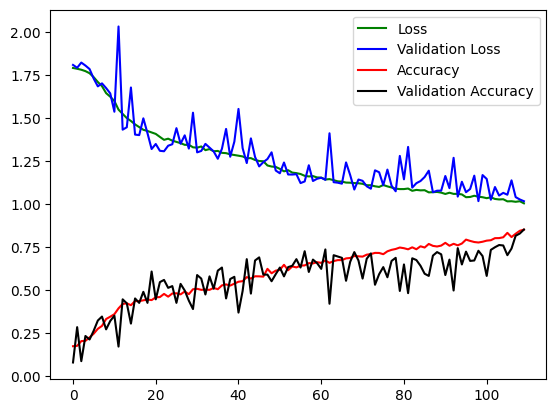

In [ ]:
plt.figure(0)
#Training loss history
plt.plot(history.history['loss'],'g', label="Loss")
#Validation loss history
plt.plot(history.history['val_loss'],'b',label="Validation Loss")
#Training accuracy history
plt.plot(history.history['accuracy'],'r', label="Accuracy")
#Validation accuracy history
plt.plot(history.history['val_accuracy'],'black', label="Validation Accuracy")
plt.legend()
plt.show()

In [ ]:
#Saving the model
yoga_classification_model_save_path = "./final_models/H5_Models/Yoga_classification_Resnet34.h5"
model.save(yoga_classification_model_save_path)

In [ ]:
#Loading the model
loaded_model = tf.keras.models.load_model('/content/final_models/H5_Models/Yoga_classification_Resnet34.h5')
loaded_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 112, 112, 64  9472        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 112, 112, 64  256        ['conv2d_3[0][0]']               
 alization)                     )                                                           

In [ ]:
# Convert the Keras model to TFLite format
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()

# Save the TFLite model to a file
yoga_final_model_name = "Yoga_Set1_TFLite_Model.tflite"
tflite_model_name = yoga_final_model_name
open(tflite_model_name, "wb").write(tflite_model)

# Define utility functions to get the file size and convert it to a human-readable format
def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size

def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size) + ' bytes')
    
# Print the size of the TFLite model in MB
convert_bytes(get_file_size(tflite_model_name), "MB")

File size: 42.651 Megabytes


In [ ]:
model.evaluate(val_datagen)   

49/49 [==============================] - 13s 263ms/step - loss: 1.0207 - accuracy: 0.8586


[1.020728588104248, 0.8586118221282959]

In [ ]:
#Encoding the labels
yoga_labels = {0:"downdog",1:"goddess",2:"mountain", 3:"tree", 4:"warrior1", 5:"warrior2"}

In [ ]:
current_file_name = "/content/dataset/final_test/yoga_set1/11.jpg"
new_file_name = "/content/dataset/final_test/yoga_set1/2.jpg"
os.rename(current_file_name, new_file_name)

Enter a number between 1 or 2 (1 if you would like to test a picture of either downdog,tree, warrior1  OR 2 for goddess,mountain,warrior2) : 1
Enter Image Name (from 1-9) : 2
1/1 [==============================] - 0s 49ms/step


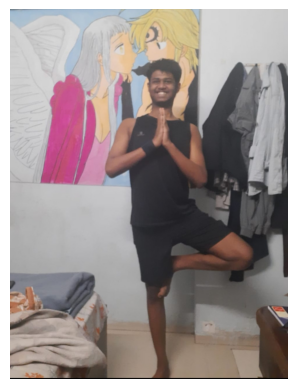

Class Predictions:  [[0.03562159 0.12767637 0.37033832 0.17769758 0.0822094  0.20645675]]

Prediction is:  mountain


In [ ]:
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg

# Prompt the user for the input parameters
path1 = input("Enter a number between 1 or 2 (1 if you would like to test a picture of either downdog,tree, warrior1  OR 2 for goddess,mountain,warrior2) : ")
path2 = input("Enter Image Name (from 1-9) : ")

# Construct the path to the image file
path = "./dataset/final_test/yoga_set" + path1 +"/" + path2+ ".jpg"

# Load the image and preprocess it for the model
img = image.load_img(path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])

# Use the loaded model to make predictions on the image
classes = loaded_model.predict(images)

# Display the image using Matplotlib
plt.axis("Off")
img = mpimg.imread(path)
plt.imshow(img)
plt.show()

# Print the predicted class label for the image
print("Class Predictions: ",classes)
pred_index = np.argmax(classes)
print("\nPrediction is: ", yoga_labels[pred_index])

1/1 [==============================] - 0s 40ms/step


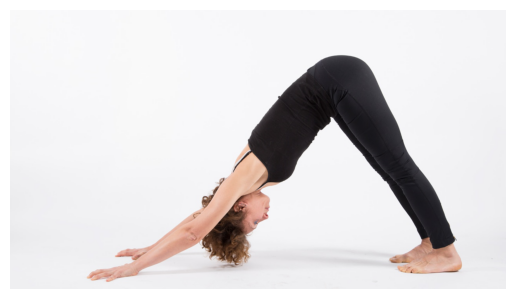

Class Predictions:  [[0.84245896 0.00983076 0.02310413 0.0313308  0.07915305 0.01412234]]

Prediction is:  downdog
1/1 [==============================] - 0s 21ms/step


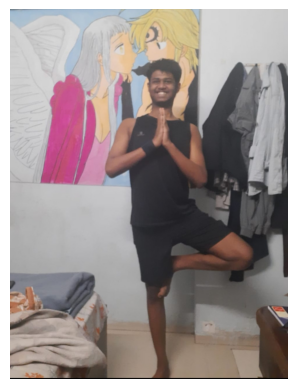

Class Predictions:  [[0.03562159 0.12767637 0.37033832 0.17769758 0.0822094  0.20645675]]

Prediction is:  mountain
1/1 [==============================] - 0s 23ms/step


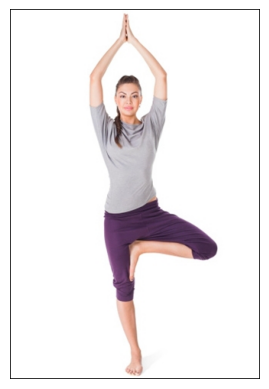

Class Predictions:  [[0.03236057 0.02504351 0.40274605 0.4952893  0.02457768 0.01998281]]

Prediction is:  tree
1/1 [==============================] - 0s 49ms/step


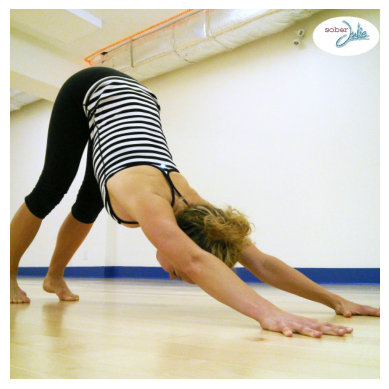

Class Predictions:  [[0.83519596 0.01016148 0.02378261 0.03205092 0.08379888 0.01501019]]

Prediction is:  downdog
1/1 [==============================] - 0s 22ms/step


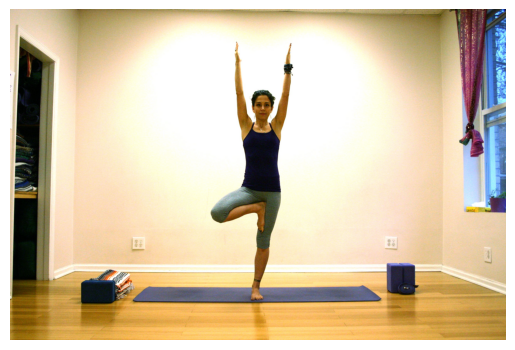

Class Predictions:  [[0.03388045 0.02648345 0.40894467 0.4797525  0.02807169 0.02286723]]

Prediction is:  tree
1/1 [==============================] - 0s 26ms/step


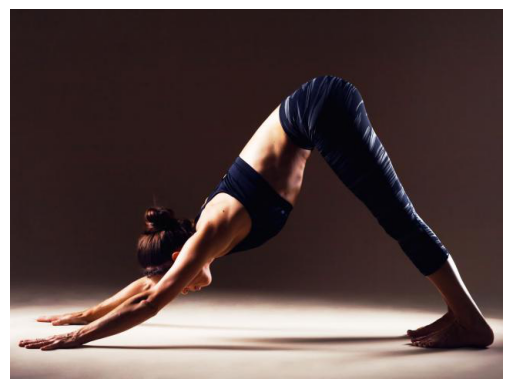

Class Predictions:  [[0.815343   0.01103176 0.02554865 0.0338904  0.09669218 0.01749391]]

Prediction is:  downdog
1/1 [==============================] - 0s 29ms/step


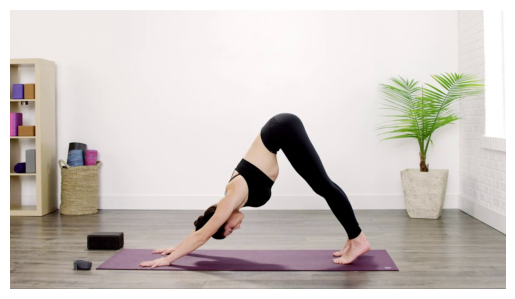

Class Predictions:  [[0.83473086 0.01018244 0.02382546 0.03209617 0.08409763 0.01506742]]

Prediction is:  downdog
1/1 [==============================] - 0s 21ms/step


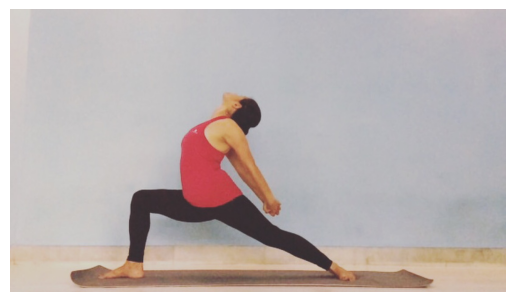

Class Predictions:  [[0.03977445 0.05484113 0.04210779 0.02842321 0.3011153  0.53373814]]

Prediction is:  warrior2
1/1 [==============================] - 0s 21ms/step


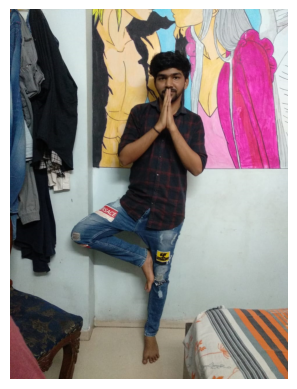

Class Predictions:  [[0.03547465 0.03707059 0.44500765 0.39445037 0.04604263 0.04195412]]

Prediction is:  mountain
1/1 [==============================] - 0s 28ms/step


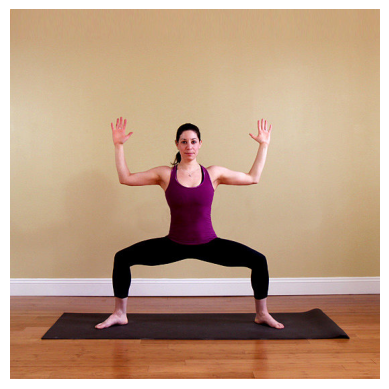

Class Predictions:  [[0.01398249 0.822562   0.0378981  0.01949532 0.01000578 0.09605637]]

Prediction is:  goddess
1/1 [==============================] - 0s 21ms/step


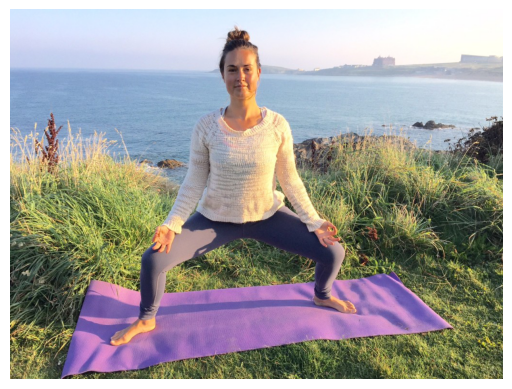

Class Predictions:  [[0.01466941 0.81076896 0.03924104 0.02025518 0.01097683 0.10408858]]

Prediction is:  goddess
1/1 [==============================] - 0s 32ms/step


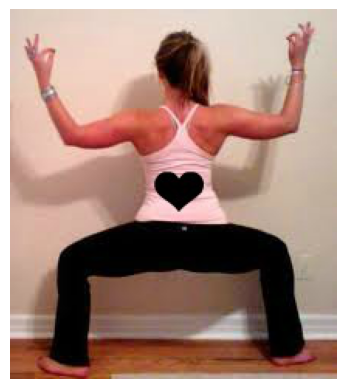

Class Predictions:  [[0.01647052 0.7786232  0.04287084 0.02230295 0.01373546 0.12599705]]

Prediction is:  goddess
1/1 [==============================] - 0s 28ms/step


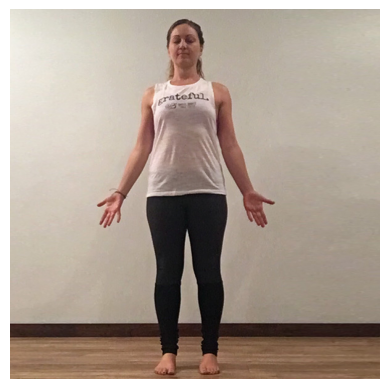

Class Predictions:  [[0.02849416 0.09334188 0.48943993 0.2483316  0.04842058 0.09197187]]

Prediction is:  mountain
1/1 [==============================] - 0s 21ms/step


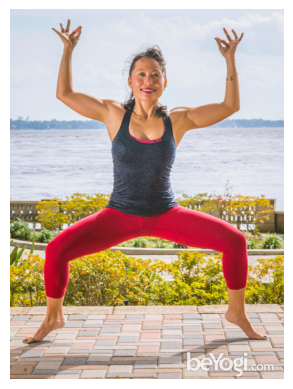

Class Predictions:  [[0.01481171 0.80830944 0.03960919 0.0204491  0.01117595 0.10564468]]

Prediction is:  goddess
1/1 [==============================] - 0s 21ms/step


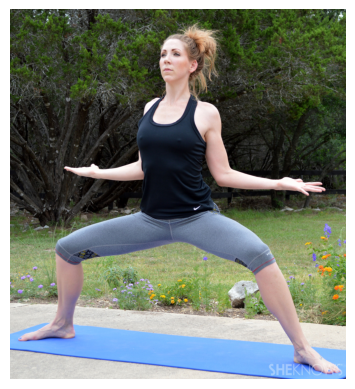

Class Predictions:  [[0.02986646 0.18318222 0.05191354 0.03015319 0.10283219 0.6020524 ]]

Prediction is:  warrior2
1/1 [==============================] - 0s 28ms/step


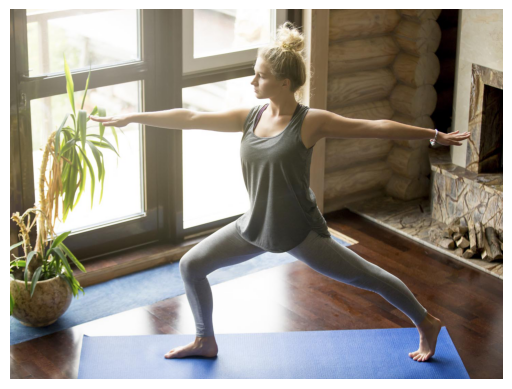

Class Predictions:  [[0.03076095 0.07146977 0.04117944 0.02564191 0.1922827  0.63866526]]

Prediction is:  warrior2
1/1 [==============================] - 0s 21ms/step


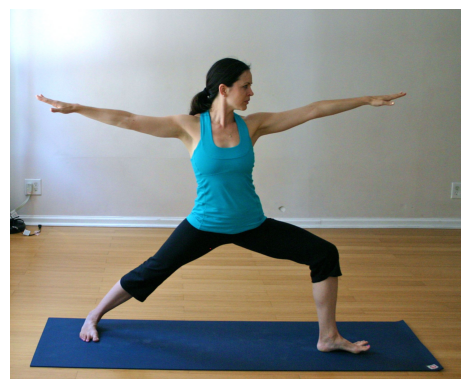

Class Predictions:  [[0.02942847 0.07747396 0.04119874 0.02532977 0.17280036 0.6537687 ]]

Prediction is:  warrior2
1/1 [==============================] - 0s 29ms/step


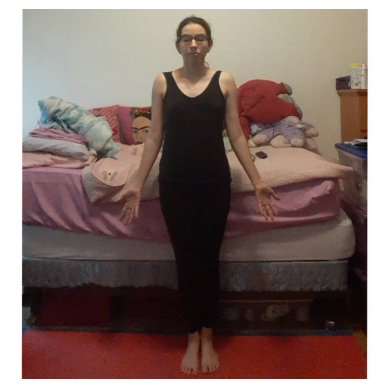

Class Predictions:  [[0.03229613 0.14926308 0.38880932 0.17842588 0.06355566 0.18764994]]

Prediction is:  mountain


In [ ]:
#Predicting all the test images
for i in range(1,3):
  for j in range(1,10):
    path = "./dataset/final_test/yoga_set" + str(i) +"/" + str(j) + ".jpg"

    img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = loaded_model.predict(images)

    plt.axis("Off")
    img = mpimg.imread(path)
    plt.imshow(img)
    plt.show()

    print("Class Predictions: ",classes)
    pred_index = np.argmax(classes)
    print("\nPrediction is: ", yoga_labels[pred_index])